# SchedTune Trace Analysis on JUNO

This notebook shows how to analyze the trace files for schedtune.

In [1]:
import logging
reload(logging)
logging.basicConfig(
    format='%(asctime)-9s %(levelname)-8s: %(message)s',
    datefmt='%I:%M:%S')

# Enable logging at INFO level
logging.getLogger().setLevel(logging.INFO)

In [2]:
# Generate plots inline
%matplotlib inline

import json
import os

# Support for trace events analysis
from trace import Trace

# Support for performance analysis of RTApp workloads
from perf_analysis import PerfAnalysis

# Suport for FTrace events parsing and visualization
import trappy

# Test setup

In [3]:
# Base folder where tests folder are located
res_dir = '../../results/nosetests_schedtune'
logging.info('Content of the output folder %s', res_dir)
!tree {res_dir}

03:12:36  INFO    : Content of the output folder ../../results/nosetests_schedtune


../../results/nosetests_schedtune
├── rtapp:boost15:mixprof
│   ├── 1
│   │   ├── cluster_freqs.png
│   │   ├── energy.json
│   │   ├── mixprof_00.json
│   │   ├── output.log
│   │   ├── rt-app-task_ramp_task0-0.log
│   │   ├── task_perf_task_ramp_task0.png
│   │   ├── task_util_4786_task_ramp_task0.png
│   │   ├── trace.dat
│   │   ├── trace.raw.txt
│   │   └── trace.txt
│   ├── kernel.config
│   ├── kernel.version
│   └── platform.json
├── rtapp:boost30:mixprof
│   ├── 1
│   │   ├── cluster_freqs.png
│   │   ├── energy.json
│   │   ├── mixprof_00.json
│   │   ├── output.log
│   │   ├── rt-app-task_ramp_task0-0.log
│   │   ├── task_perf_task_ramp_task0.png
│   │   ├── task_util_5336_task_ramp_task0.png
│   │   ├── trace.dat
│   │   ├── trace.raw.txt
│   │   └── trace.txt
│   ├── kernel.config
│   ├── kernel.version
│   └── platform.json
├── rtapp:boost60:mixprof
│   ├── 1
│   │   ├── cluster_freqs.png
│   │   ├── energy.json
│   │   ├── mixprof_00.json
│   │   ├── output.log
│   │   ├

# Configuration

In [4]:
# Full analysis function
def analysis(test_id, t_min=None, t_max=None):
    
    test_dir = '{}/rtapp:{}:mixprof'.format(res_dir, test_id)
    run_dir = '{}/1'.format(test_dir)
    platform_json = '{}/platform.json'.format(test_dir)
    trace_file = '{}/trace.dat'.format(run_dir)
    logging.info("trace_file={}".format(trace_file))
    
    # Load platform description data
    with open(platform_json, 'r') as fh:
        platform = json.load(fh)

    # Load RTApp Performance data
    pa = PerfAnalysis(run_dir)
    logging.info("Loaded performance data for tasks: %s", pa.tasks())
    
    # Load Trace data
    events = [
            "cpu_frequency",
            "sched_load_avg_cpu",
            "sched_load_avg_task",
            "sched_switch",
            "dequeue_task_fair",
            "enqueue_task_fair", 
            "set_next_entity",
            "cpu_capacity",
            "sched_blocked_reason",
            "sched_boost_cpu",
            "sched_boost_task",
            "sched_contrib_scale_f",
            "sched_cpu_hotplug",
            "sched_energy_diff",
            "sched_kthread_stop",
            "sched_kthread_stop_ret",
            "sched_load_avg_cpu",
            "sched_load_avg_task",
            "sched_migrate_task",
            "sched_move_numa",
            "sched_pi_setprio",
            "sched_process_exec",
            "sched_process_exit",
            "sched_process_fork",
            "sched_process_free",
            "sched_process_wait",
            "sched_stat_blocked",
            "sched_stat_iowait",
            "sched_stat_runtime",
            "sched_stat_sleep",
            "sched_stat_wait",
            "sched_stick_numa",
            "sched_swap_numa",
            "sched_switch",
            "sched_tune_boostgroup_update",
            "sched_tune_config",
            "sched_tune_tasks_update",
            "sched_tune_filter",
            "sched_wait_task",
            "sched_wake_idle_without_ipi",
            "sched_wakeup",
            "sched_wakeup_new",
    ]
    trace = Trace(platform, run_dir, events, tasks=pa.tasks())
    
    # Define time ranges for all the temporal plots
    trace.setXTimeRange(t_min, t_max)
    
    # Tasks plots
    trace.analysis.tasks.plotTasks()
    for task in pa.tasks():
        pa.plotPerf(task)

    # Cluster plots
    trace.analysis.frequency.plotClusterFrequencies()


# Results

## No Boosting

03:12:40  INFO    : trace_file=../../results/nosetests_schedtune/rtapp:noboost:mixprof/1/trace.dat
03:12:40  INFO    : Loaded performance data for tasks: ['task_ramp_task0']
03:12:40  INFO    : Parsing FTrace format...
03:12:41  INFO    : Platform clusters verified to be Frequency coherent
03:12:41  INFO    :   task  task_ramp_task0 found, pid: [3685]
03:12:41  INFO    : Collected events spans a 10.072 [s] time interval
03:12:41  INFO    : Set plots time range to (0.000000, 10.072247)[s]
03:12:41  INFO    : Registering trace analysis modules:
03:12:41  INFO    :    tasks
03:12:41  INFO    :    idle
03:12:41  INFO    :    latency
03:12:41  INFO    :    functions
03:12:41  INFO    :    frequency
03:12:41  INFO    :    status
03:12:41  INFO    :    eas
03:12:41  INFO    :    cpus
03:12:41  INFO    : Set plots time range to (0.000000, 10.072247)[s]
03:12:41  INFO    : Plotting  3685: task_ramp_task0, rt-app...


Maximum estimated system energy: 1725


03:12:42  WARNING : Event [sched_overutilized] not found, plot DISABLED!
03:12:42  WARNING : Event [sched_overutilized] not found, plot DISABLED!
03:12:42  WARNING : Event [sched_overutilized] not found, plot DISABLED!
03:12:43  INFO    : PerfIndex, Task [task_ramp_task0] avg: 0.96, std: 0.02
03:12:43  WARNING : Event [sched_overutilized] not found, plot DISABLED!
03:12:43  WARNING : Event [sched_overutilized] not found, plot DISABLED!
03:12:44  INFO    : LITTLE cluster average frequency: 0.826 GHz
03:12:44  INFO    : big    cluster average frequency: 0.714 GHz


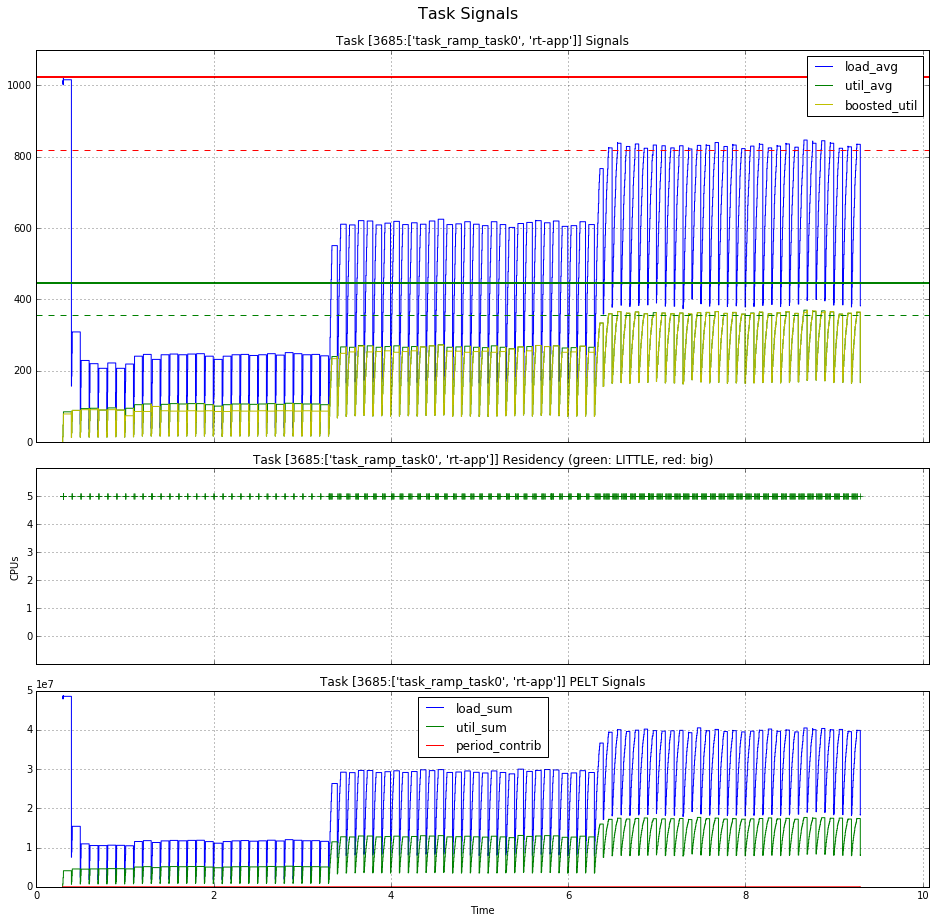

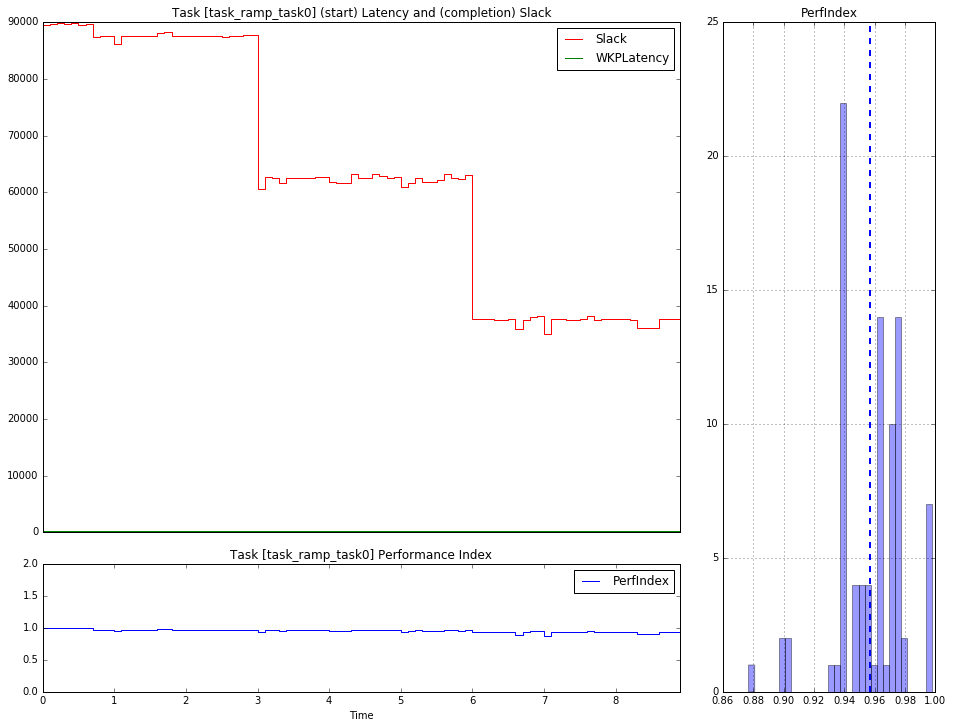

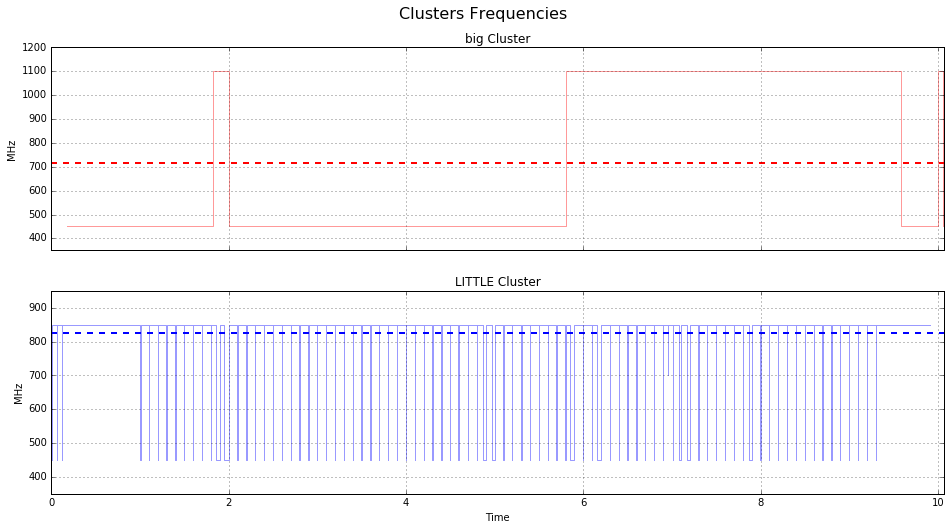

In [5]:
analysis('noboost')

## Boost 15%

03:12:55  INFO    : trace_file=../../results/nosetests_schedtune/rtapp:boost15:mixprof/1/trace.dat
03:12:55  INFO    : Loaded performance data for tasks: ['task_ramp_task0']
03:12:55  INFO    : Parsing FTrace format...
03:12:56  INFO    : Platform clusters verified to be Frequency coherent
03:12:56  INFO    :   task  task_ramp_task0 found, pid: [4786]
03:12:56  INFO    : Collected events spans a 10.098 [s] time interval
03:12:56  INFO    : Set plots time range to (0.000000, 10.097751)[s]
03:12:56  INFO    : Registering trace analysis modules:
03:12:56  INFO    :    tasks
03:12:56  INFO    :    idle
03:12:56  INFO    :    latency
03:12:56  INFO    :    functions
03:12:56  INFO    :    frequency
03:12:56  INFO    :    status
03:12:56  INFO    :    eas
03:12:56  INFO    :    cpus
03:12:56  INFO    : Set plots time range to (0.000000, 10.097751)[s]
03:12:56  INFO    : Plotting  4786: task_ramp_task0, rt-app...


Maximum estimated system energy: 1725


03:12:57  WARNING : Event [sched_overutilized] not found, plot DISABLED!
03:12:57  WARNING : Event [sched_overutilized] not found, plot DISABLED!
03:12:57  WARNING : Event [sched_overutilized] not found, plot DISABLED!
03:12:58  INFO    : PerfIndex, Task [task_ramp_task0] avg: 1.34, std: 0.37
03:12:59  WARNING : Event [sched_overutilized] not found, plot DISABLED!
03:12:59  WARNING : Event [sched_overutilized] not found, plot DISABLED!
03:12:59  INFO    : LITTLE cluster average frequency: 0.706 GHz
03:12:59  INFO    : big    cluster average frequency: 0.790 GHz


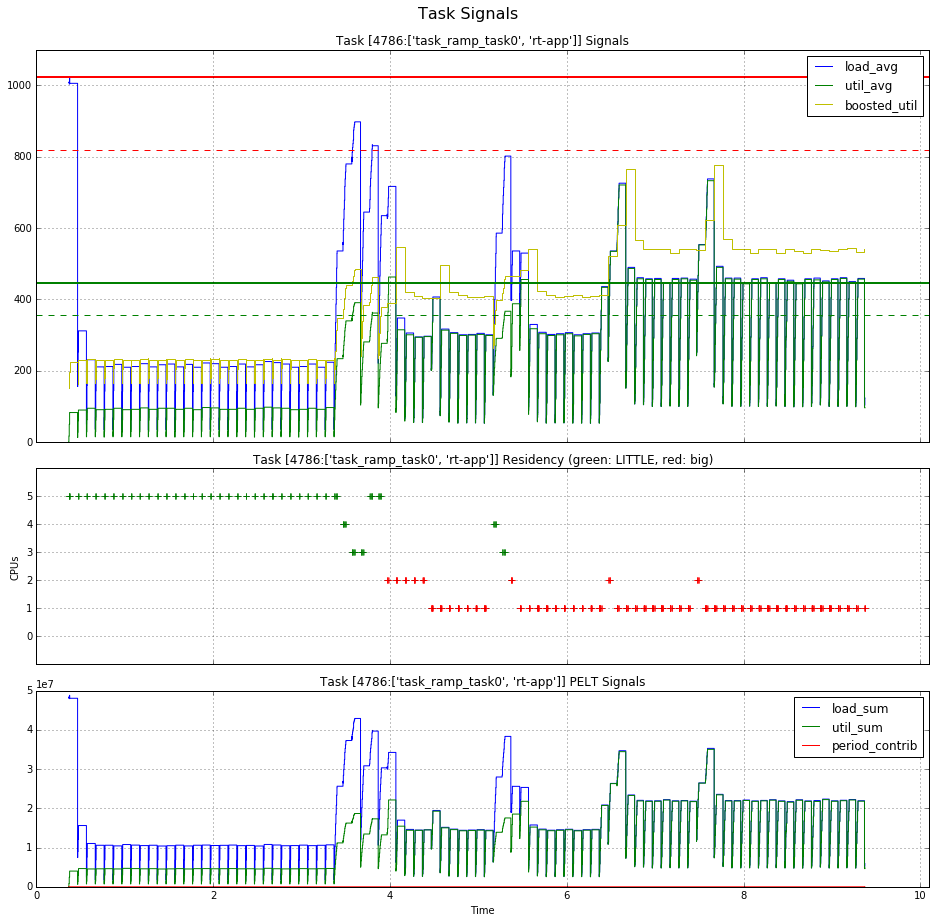

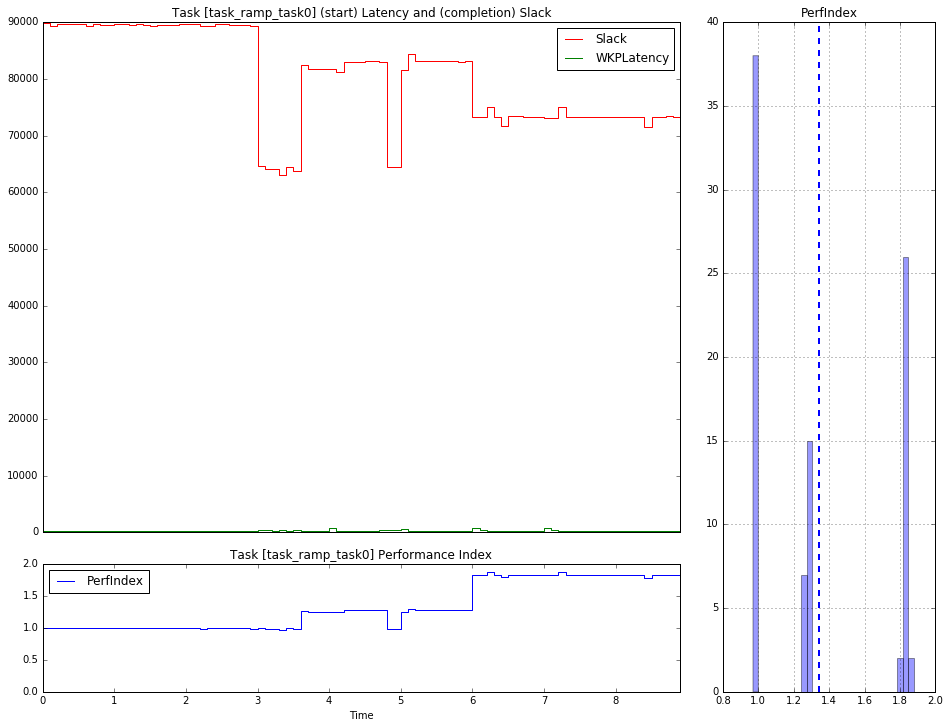

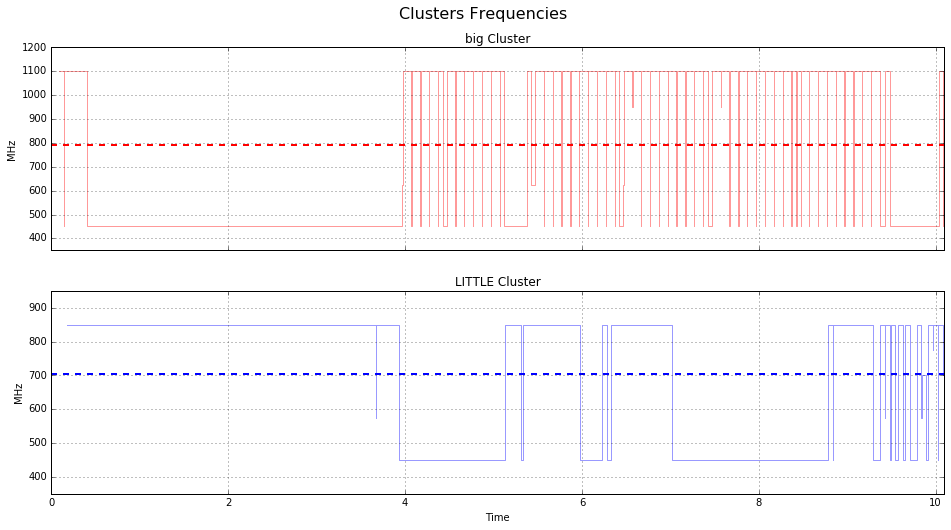

In [6]:
analysis('boost15')

## Boost 30%

03:13:09  INFO    : trace_file=../../results/nosetests_schedtune/rtapp:boost30:mixprof/1/trace.dat
03:13:09  INFO    : Loaded performance data for tasks: ['task_ramp_task0']
03:13:09  INFO    : Parsing FTrace format...
03:13:10  INFO    : Platform clusters verified to be Frequency coherent
03:13:10  INFO    :   task  task_ramp_task0 found, pid: [5336]
03:13:10  INFO    : Collected events spans a 10.136 [s] time interval
03:13:10  INFO    : Set plots time range to (0.000000, 10.136261)[s]
03:13:10  INFO    : Registering trace analysis modules:
03:13:10  INFO    :    tasks
03:13:10  INFO    :    idle
03:13:10  INFO    :    latency
03:13:10  INFO    :    functions
03:13:10  INFO    :    frequency
03:13:10  INFO    :    status
03:13:10  INFO    :    eas
03:13:10  INFO    :    cpus
03:13:10  INFO    : Set plots time range to (0.000000, 10.136261)[s]
03:13:10  INFO    : Plotting  5336: task_ramp_task0, rt-app...


Maximum estimated system energy: 1725


03:13:11  WARNING : Event [sched_overutilized] not found, plot DISABLED!
03:13:11  WARNING : Event [sched_overutilized] not found, plot DISABLED!
03:13:11  WARNING : Event [sched_overutilized] not found, plot DISABLED!
03:13:12  INFO    : PerfIndex, Task [task_ramp_task0] avg: 1.37, std: 0.34
03:13:12  WARNING : Event [sched_overutilized] not found, plot DISABLED!
03:13:12  WARNING : Event [sched_overutilized] not found, plot DISABLED!
03:13:13  INFO    : LITTLE cluster average frequency: 0.795 GHz
03:13:13  INFO    : big    cluster average frequency: 1.042 GHz


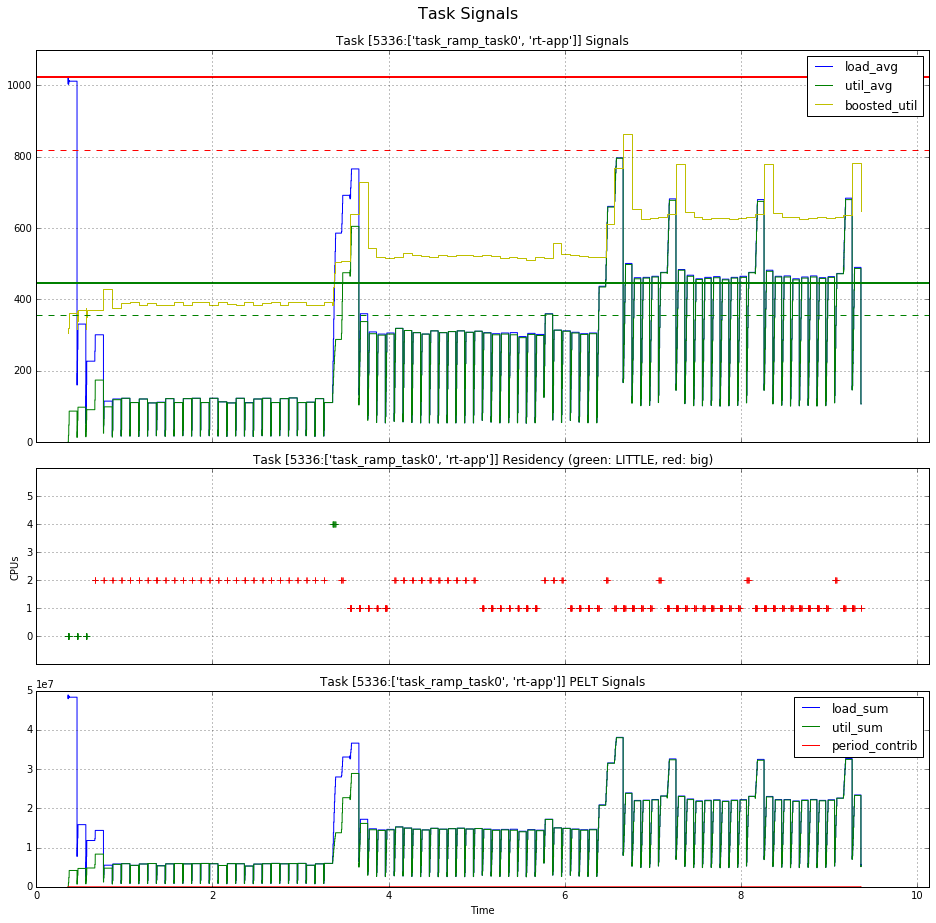

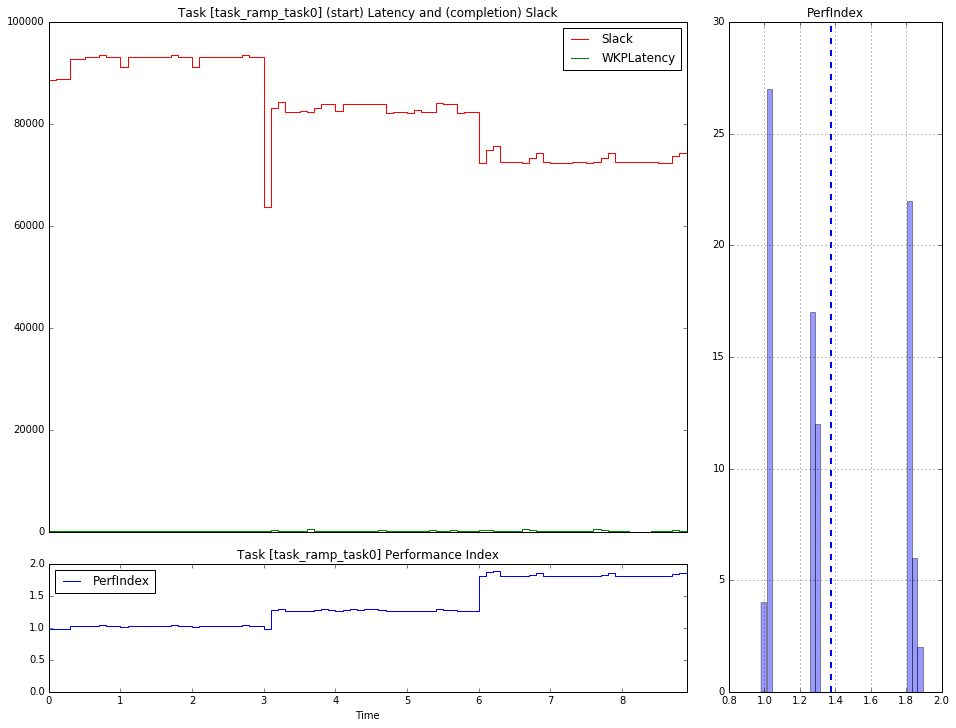

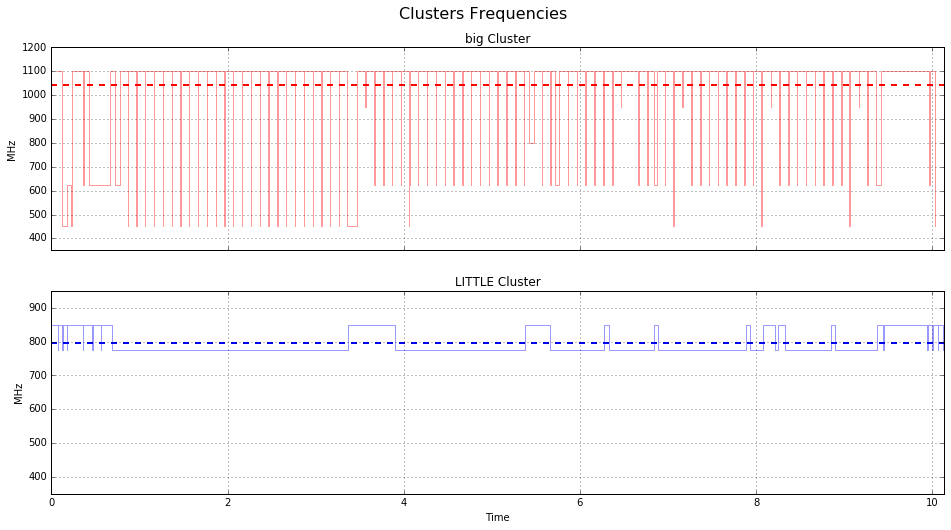

In [7]:
analysis('boost30')

# Boost 60%

03:13:24  INFO    : trace_file=../../results/nosetests_schedtune/rtapp:boost60:mixprof/1/trace.dat
03:13:24  INFO    : Loaded performance data for tasks: ['task_ramp_task0']
03:13:24  INFO    : Parsing FTrace format...
03:13:26  INFO    : Platform clusters verified to be Frequency coherent
03:13:26  INFO    :   task  task_ramp_task0 found, pid: [5897]
03:13:26  INFO    : Collected events spans a 9.965 [s] time interval
03:13:26  INFO    : Set plots time range to (0.000000, 9.965170)[s]
03:13:26  INFO    : Registering trace analysis modules:
03:13:26  INFO    :    tasks
03:13:26  INFO    :    idle
03:13:26  INFO    :    latency
03:13:26  INFO    :    functions
03:13:26  INFO    :    frequency
03:13:26  INFO    :    status
03:13:26  INFO    :    eas
03:13:26  INFO    :    cpus
03:13:26  INFO    : Set plots time range to (0.000000, 9.965170)[s]
03:13:26  INFO    : Plotting  5897: task_ramp_task0, rt-app...


Maximum estimated system energy: 1725


03:13:26  WARNING : Event [sched_overutilized] not found, plot DISABLED!
03:13:26  WARNING : Event [sched_overutilized] not found, plot DISABLED!
03:13:26  WARNING : Event [sched_overutilized] not found, plot DISABLED!
03:13:27  INFO    : PerfIndex, Task [task_ramp_task0] avg: 1.42, std: 0.35
03:13:28  WARNING : Event [sched_overutilized] not found, plot DISABLED!
03:13:28  WARNING : Event [sched_overutilized] not found, plot DISABLED!
03:13:28  INFO    : LITTLE cluster average frequency: 0.850 GHz
03:13:28  INFO    : big    cluster average frequency: 1.046 GHz


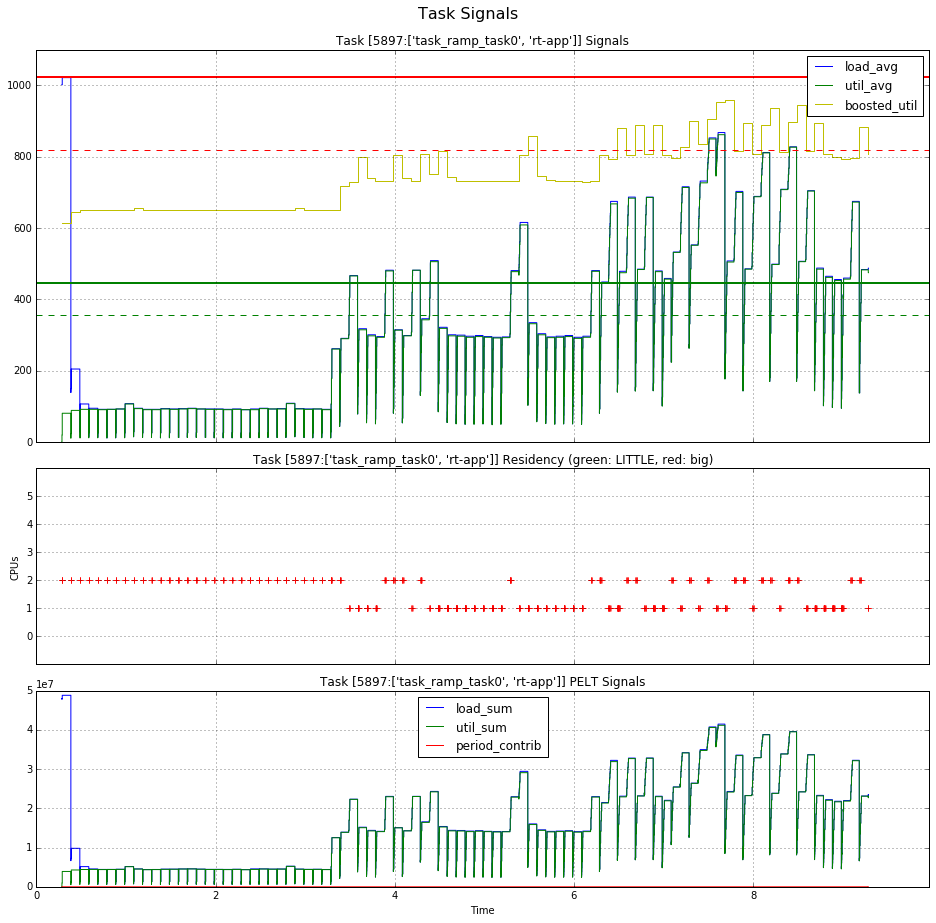

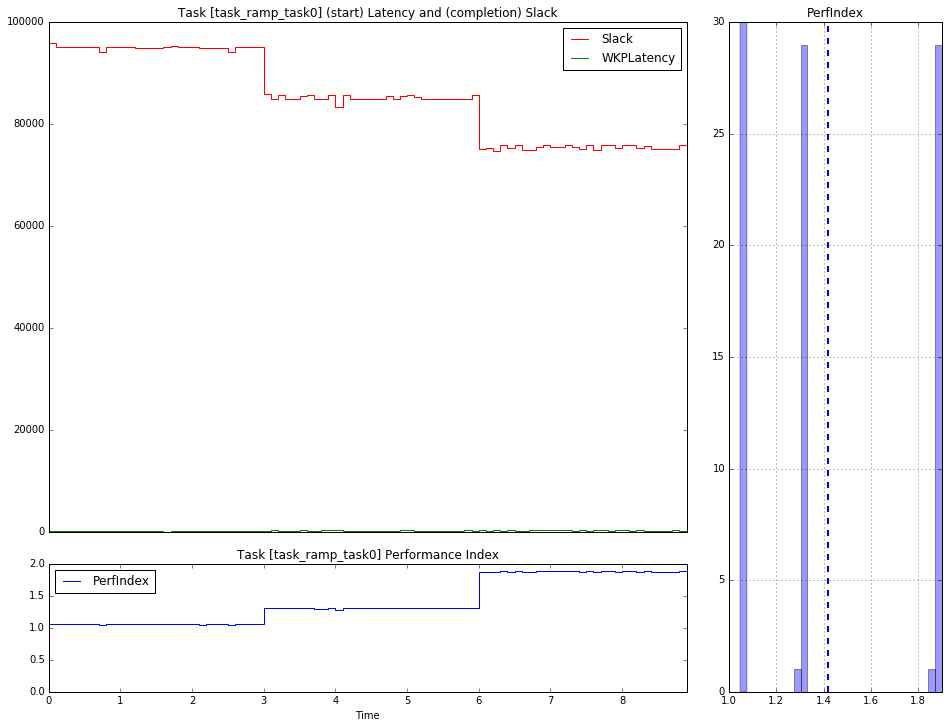

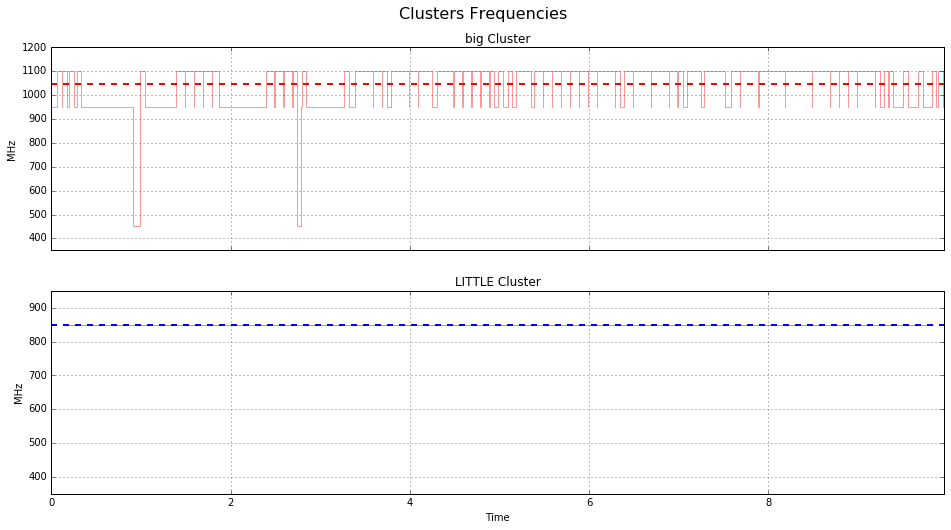

In [8]:
analysis('boost60')